Step 1. Ensure that you have the dataset file named `transactions.csv` in the current directory.

The dataset is a subset of https://www.kaggle.com/ealaxi/paysim1/version/2 which was originally generated as part of the following research:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

Step 2. Complete the following exercises.

0. Read the dataset (`transactions.csv`) as a Pandas dataframe. Note that the first row of the CSV contains the column names.

0. Return the column names as a list from the dataframe.

0. Return the first k rows from the dataframe.

0. Return a random sample of k rows from the dataframe.

0. Return a list of the unique transaction types.

0. Return a Pandas series of the top 10 transaction destinations with frequencies.

0. Return all the rows from the dataframe for which fraud was detected.

0. Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. You will find [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) useful. The predefined aggregate functions are under `pandas.core.groupby.GroupBy.*`. See the [left hand column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html).

Use the empty cell to test the exercises. If you modify the original `df`, you can rerun the cell containing `exercise_0`.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def exercise_0(file):
    df = pd.read_csv("transactions.csv")
    return df

def exercise_1(df):
    column_names = df.columns.tolist()
    return column_names

def exercise_2(df, k):
    def first_k_rows(k):
        return df.head(k)

def exercise_3(df, k):
    def random_sample(k):
        return df.sample(k)

def exercise_4(df):
    unique_transaction_types = df['type'].unique().tolist()

def exercise_5(df):
    top_10_destinations = df['nameDest'].value_counts().head(10)

def exercise_6(df):
    fraudulent_transactions = df[df['isFraud'] == True]

def exercise_7(df):
    distinct_destinations_per_source = df.groupby('nameOrig')['nameDest'].nunique().reset_index(name='distinct_destinations').sort_values(by='distinct_destinations', ascending=False)



In [8]:
df = exercise_0('transactions.csv')

In [3]:
# Test exercises here


Create graphs for the following. 
1. Transaction types bar chart, Transaction types split by fraud bar chart
1. Origin account balance delta v. Destination account balance delta scatter plot for Cash Out transactions

Ensure that the graphs have the following:
 - Title
 - Labeled Axes
 
The function plot the graph and then return a string containing a short description explaining the relevance of the chart.

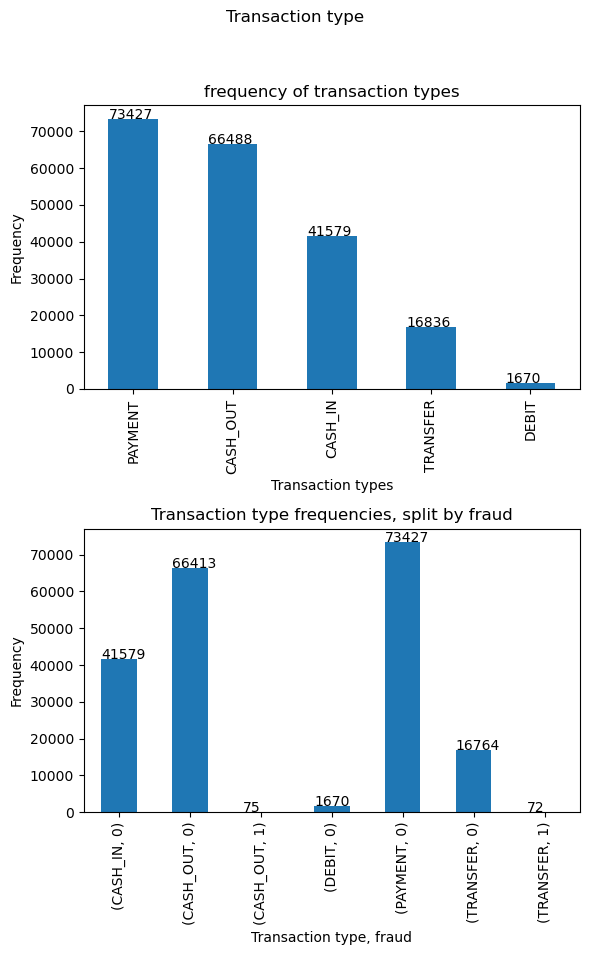

'This bar chart shows transaction types split by fraud.It is interesting to note that the only fraudulent transactions are CASH_OUT and TRANSFER.This information will be insightful to management as they can place focus on adding security to these types of transactions.'

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

def visual_1(df):
    def transaction_counts(df):
        return df['type'].value_counts()
    
    def transaction_counts_split_by_fraud(df):
        return df.groupby(by=['type', 'isFraud']).size()

    fig, axs = plt.subplots(2, figsize=(6,10))
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('frequency of transaction types')
    axs[0].set_xlabel('Transaction types')
    axs[0].set_ylabel('Frequency')
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Transaction type frequencies, split by fraud')
    axs[1].set_xlabel('Transaction type, fraud')
    axs[1].set_ylabel('Frequency')
    fig.suptitle('Transaction type')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    plt.show()
    return 'This bar chart shows transaction types split by fraud.It is interesting to note that the only fraudulent transactions are CASH_OUT and TRANSFER.'\
            'This information will be insightful to management as they can place focus on adding security to these types of transactions.'

df = exercise_0("transactions.csv")

visual_1(df)


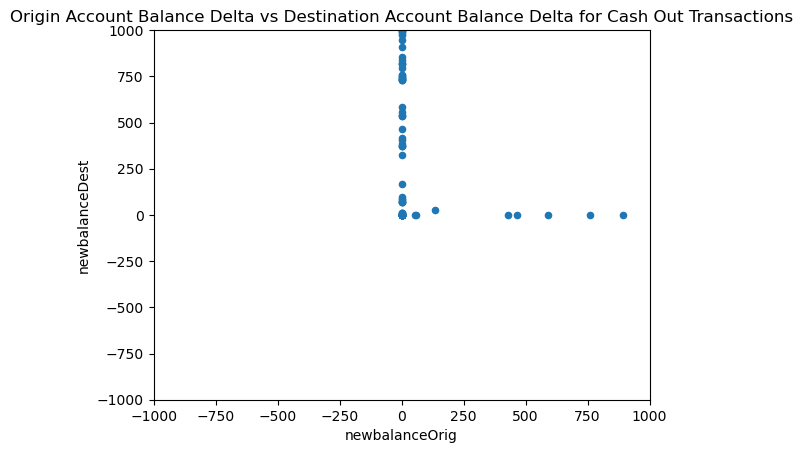

'Scatter plot showing Origin account balance delta compared to Destination account balance delta for Cash Out transactions.When comparing the origin account balance to the destination account balance, it is reassuring that there are no values that are less than 0. This means that there are no accounts that are overdrawn, and all accounts meet a minimum balance of 0.0 '

In [5]:
def visual_2(df):
    def query(df):
        cash_out_transactions = df[df['type'] == 'CASH_OUT'] 
        return cash_out_transactions[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
    
    cash_out_df = query(df)
    plot = query(df).plot.scatter(x='newbalanceOrig',y='newbalanceDest')
    plot.set_title('Origin Account Balance Delta vs Destination Account Balance Delta for Cash Out Transactions')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    plt.show()
    return 'Scatter plot showing Origin account balance delta compared to Destination account balance delta for Cash Out transactions.'\
            'When comparing the origin account balance to the destination account balance, it is reassuring that there are no values that are less than 0. '\
            'This means that there are no accounts that are overdrawn, and all accounts meet a minimum balance of 0.0 '

visual_2(df)


Use your newly-gained Pandas skills to find an insight from the dataset. You have full flexibility to go in whichever direction interests you. Please create a visual as above for this query. `visual_custom` should call `exercise_custom`.

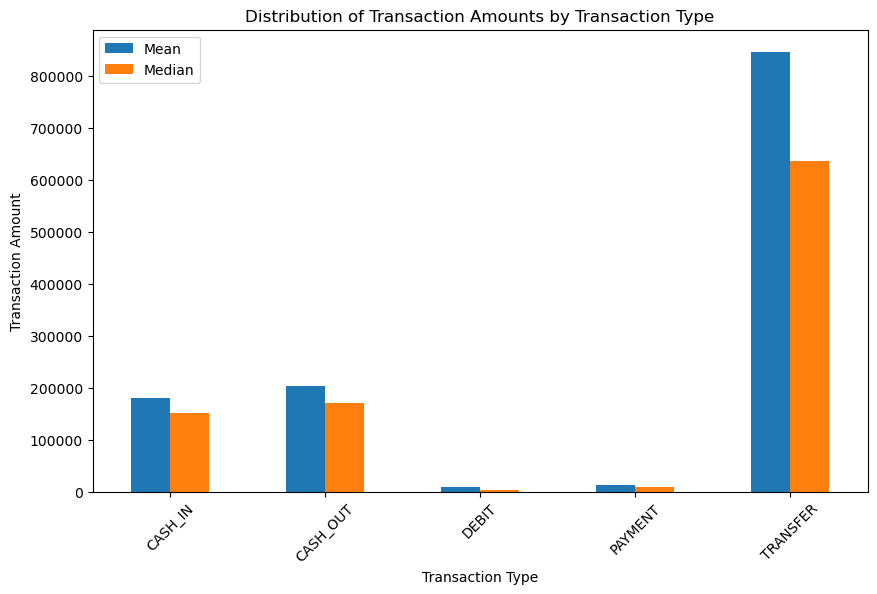

'This is a  bar graph that visualizes the distribution of transaction amounts (mean and median) for different transaction types based on the database.'

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

def exercise_custom(df):
    summary_stats = df.groupby('type')['amount'].describe()
    return summary_stats


def visual_custom(df):
    summary_stats = exercise_custom(df)
    

    summary_stats[['mean', '50%']].plot(kind='bar', figsize=(10, 6))
    plt.title('Distribution of Transaction Amounts by Transaction Type')
    plt.xlabel('Transaction Type')
    plt.ylabel('Transaction Amount')
    plt.xticks(rotation=45)
    plt.legend(['Mean', 'Median'])
    plt.show()

    return "This is a  bar graph that visualizes the distribution of transaction amounts (mean and median) for different transaction types based on the database."


visual_custom(df)


Submission

1. Copy the exercises into `task1.py`.
2. Upload `task1.py` to Forage.

All done!

Your work will be instrumental for our team's continued success.